### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from keras.layers import Conv2D, Flatten, Dropout, MaxPool2D, Dense
from keras import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

### Data Loading and Preprocessing

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X_train = train.drop(['label'], axis=1)
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
y_train = tensorflow.keras.utils.to_categorical(train['label'], num_classes=10)

In [4]:
test = test / 255.0
test = test.values.reshape(-1, 28, 28, 1)

In [5]:
(X_train_MNIST, y_train_MNIST), (X_test_MNIST, y_test_MNIST) = mnist.load_data()
train_mnist = np.concatenate((X_train_MNIST, X_test_MNIST))
test_mnist = np.concatenate((y_train_MNIST, y_test_MNIST))

train_mnist = train_mnist.reshape(-1, 28, 28, 1)
train_mnist = train_mnist / 255.0

test_mnist = tensorflow.keras.utils.to_categorical(test_mnist, num_classes=10)

images = np.concatenate((X_train, train_mnist))
labels = np.concatenate((y_train, test_mnist))

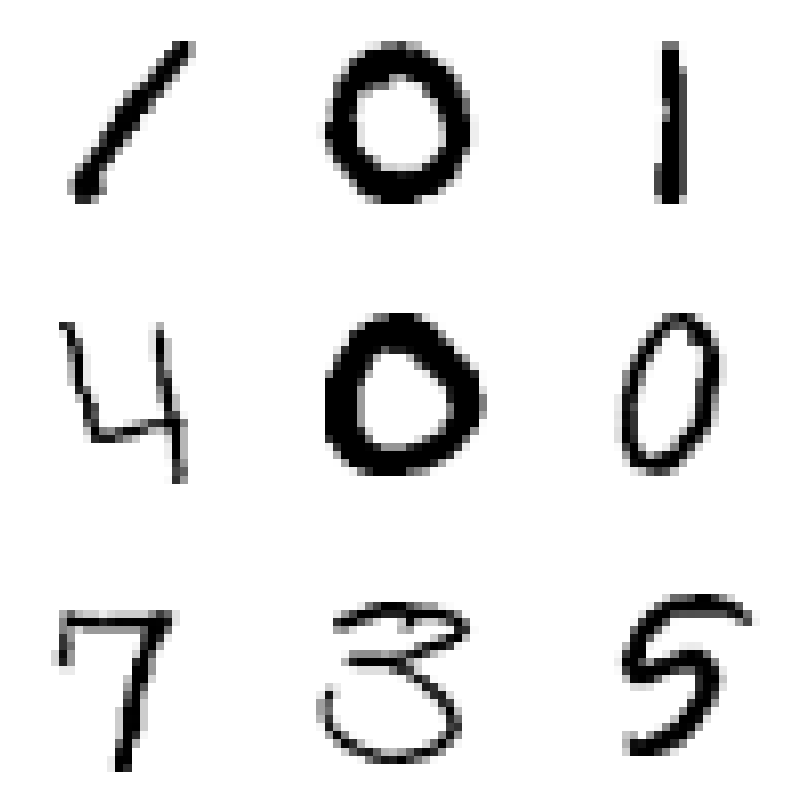

In [6]:
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.axis("off")
plt.show()

In [7]:
print(images.shape)
print(labels.shape)

(112000, 28, 28, 1)
(112000, 10)


### Data Augmentation

In [8]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, shear_range=15, zoom_range=0.1,
                             validation_split=0.25)

In [9]:
train_dataset = datagen.flow(images, labels, batch_size=256, subset='training')

In [10]:
test_dataset = datagen.flow(images, labels, batch_size=64, subset='validation')

### Model Building

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(filters=32, kernel_size=5, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

In [13]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Model Compilation and Training

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)
checkpoint = ModelCheckpoint(filepath='model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)

In [16]:
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[reduce_lr, checkpoint])

NameError: name 'scipy' is not defined

### Plotting Training History

In [ ]:
plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test = pd.read_csv('test.csv')

test = np.array(test, dtype=np.float32) / 255
test = test.reshape(-1, 28, 28, 1)
prediction = model.predict(test)
predict = np.array(np.round(prediction), dtype=np.int32)
predict = np.argmax(predict, axis=1).reshape(-1, 1)
out = [{'ImageId': i + 1, 'Label': predict[i][0]} for i in range(len(predict))]
pd.DataFrame(out).to_csv('submission.csv', index=False)

In [ ]:
### Importing Necessary Libraries
import numpy as np
import pandas as pd
import tensorflow
from keras.layers import Conv2D, Flatten, Dropout, MaxPool2D, Dense
from keras import Sequential
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

### Data Loading and Preprocessing
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop(['label'], axis=1)
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1, 28, 28, 1)
y_train = tensorflow.keras.utils.to_categorical(train['label'], num_classes=10)
test = test / 255.0
test = test.values.reshape(-1, 28, 28, 1)
(X_train_MNIST, y_train_MNIST), (X_test_MNIST, y_test_MNIST) = mnist.load_data()
train_mnist = np.concatenate((X_train_MNIST, X_test_MNIST))
test_mnist = np.concatenate((y_train_MNIST, y_test_MNIST))

train_mnist = train_mnist.reshape(-1, 28, 28, 1)
train_mnist = train_mnist / 255.0

test_mnist = tensorflow.keras.utils.to_categorical(test_mnist, num_classes=10)

images = np.concatenate((X_train, train_mnist))
labels = np.concatenate((y_train, test_mnist))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.axis("off")
plt.show()
print(images.shape)
print(labels.shape)
### Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, shear_range=15, zoom_range=0.1,
                             validation_split=0.25)
train_dataset = datagen.flow(images, labels, batch_size=256, subset='training')
test_dataset = datagen.flow(images, labels, batch_size=64, subset='validation')
### Model Building
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
### Model Compilation and Training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)
checkpoint = ModelCheckpoint(filepath='model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[reduce_lr, checkpoint])
### Plotting Training History
plt.figure(figsize=(14, 5))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
test = pd.read_csv('test.csv')

test = np.array(test, dtype=np.float32) / 255
test = test.reshape(-1, 28, 28, 1)
prediction = model.predict(test)
predict = np.array(np.round(prediction), dtype=np.int32)
predict = np.argmax(predict, axis=1).reshape(-1, 1)
out = [{'ImageId': i + 1, 'Label': predict[i][0]} for i in range(len(predict))]
pd.DataFrame(out).to_csv('submission.csv', index=False)
